[Indice](index.ipynb) | Previo: [FormalismoHamiltoniano.EcuacionesCanonicas](10.01.00.00.FormalismoHamiltoniano.EcuacionesCanonicas.ipynb) | Siguiente: [FormalismoHamiltoniano.Simetrias](10.02.00.00.FormalismoHamiltoniano.Simetrias.ipynb)

## 10.5. Dinámica en el espacio de fase
<a id='espacio_fase'></a>

Como vimos en secciones anteriores, las ecuaciones canónicas de Hamilton surgieron, en la presentación que estamos haciendo aquí del formalismo Hamiltoniano, como solución al problema de la linearización de las ecuaciones de Euler-Lagrange.  Linearización que a su vez nos permitió eliminar la degeneración del espacio de configuración. Pero las consecuencias geométricas derivadas de las Ecs. ([dq_H](#mjx-eqn-eq%3Adq_H)) y ([dp_H](#mjx-eqn-eq%3Adp_H)) van mucho más allá que la solución a un problema de degeneración geométrica.

En el espacio de fase $\{p_j\}-\{q_j\}$, el Hamiltoniano se puede interpretar como un campo escalar que toma un valor específico en cada punto.  Las derivadas parciales que aparecen en las ecuaciones canónicas no son otra cosa  que las componentes de un *gradiente generalizado* del Hamiltoniano. Las ecuaciones canónicas mismas, indican la dirección y el sentido en el que se moverá el sistema dinámico a partir de un determinado punto. 

Pero ¿qué significa que la ecuación que nos informa la dirección y tasa de cambio de $q_j$ dependa de la componente del gradiente en dirección de $p_j$? ¿cómo interpretar que la ecuación para la tasa de cambio de $p_j$ tenga un signo negativo?.  En la figura Figura ([espacio_fase_interpretacion](#fig:espacio_fase_interpretacion)) hemos representado esquemáticamente todas las cantidades relevantes que aparecen en las ecuaciones canónicas de Hamilton y la manera como ellas determinan la dirección y sentido del movimiento.

<a id='fig:espacio_fase_interpretacion'></a>![Interpretación de las cantidades relevantes en el formalismo Hamiltoniano y de las ecuaciones canónicas en el espacio de fase.++t!++0.5++\label{fig:espacio_fase_interpretacion}](./figures/square_espacio_fase_interpretacion.png)

<center><b>Figura 10.172</b>. Interpretación de las cantidades relevantes en el formalismo Hamiltoniano y de las ecuaciones canónicas en el espacio de fase.</center>

Como vemos en la gráfica, en el espacio de fase el movimiento del sistema se produce sobre líneas de igual valor de H.  La razón de ello viene justamente de que la tasa de cambio de $q$ sea proporcional a la componente $p$ el gradiente y viceversa.  Por otro lado, el signo negativo de la tasa de variación de $p_j$ determina el sentido de movimiento del sistema en el espacio de fase, que siempre ocurre en la dirección que va de los eje(s) $p$ a el(los) eje(s) $x$.  Para sistemas con solo un grado de libertad, esto significa que la partícula se mueve en el espacio de fase siempre en el sentido de las manecillas del reloj.

La dinámica, en el formalismo Hamiltoniano, ¡es pura geometría!.

### 10.5.1. El péndulo simple en el espacio de fase
<a id='pendulo_fase'></a>

Para ilustrar estos conceptos y otros asociados a ellos, consideremos un sistema específico: el péndulo simple.  Conocemos bien el comportamiento de este sistema, lo hemos estudiado tanto con el formalismo vectorial como con el formalismo lagrangiano.  Este conocimient nos permitirá comprobar si lo que predecimos con el geométrico formalismo Hamiltoniano es correcto.

Para empezar necesitamos escribir el Hamiltoniano del sistema.  Para ello es necesario, primero, escribir el Lagrangiano clásico del sistema.  No es difícil mostrar (ver Problemas al final del capítulo) que el Lagrangiano del péndulo simple es:

\begin{equation}
\label{eq:lagrangiano_pendulo_simple}
L_\mathrm{PS}(\theta,\dot\theta)=\frac{1}{2}m L^2\dot\theta^2+m g L cos\theta
\end{equation}

El momento generalizado asociado a la variable $\theta$ esta dado por (la transformación de Legendre):

$$
p_\theta=\frac{\partial L}{\partial\dot\theta}=mL^2\dot\theta
$$

La velocidad generalizada $\dot\theta$ será en términos del momento $p_\theta$:

$$
\dot\theta=\frac{p_\theta}{mL^2}
$$
que usarse para reemplazar $\dot \theta$ en el lagrangiano clásico y de ese modo optener el Lagrangiano modificado $L_{qp}$:

$$
L_{{\rm PS},\theta p}=\frac{p_\theta^2}{2mL^2}+mgL\cos\theta
$$

Con esto la función Hamiltoniana queda finalmente como:

$$
H_\mathrm{PS}(\theta,p_\theta)=p_\theta \dot\theta-L_{\theta p}=\frac{p_\theta^2}{mL^2}-\frac{p_\theta^2}{2mL^2}-mgL\cos\theta
$$
que simplificando se convierte en:

$$
H_\mathrm{PS}(\theta,p_\theta)=\frac{p_\theta^2}{2mL^2}-mgL\cos\theta
$$

Conocer el Hamiltoniano del péndulo simple, nos permité hacer un mapa de la dinámica en el espacio de fase.  Para ello, es necesario dibujar la curvas de contorno de $H_\mathrm{PS}$ que marcan el camino que seguirán partículas de prueba puestas en cualquier lugar del espacio de fase. Con el siguiente algoritmo creamos una malla coordenada en el espacio de fase y calculamos los valores sobre la malla del Hamiltoniano:

In [1]:
#Parámetros del sistema
m=1.0 #kg 
g=9.81 #m/s^2
L=1.0 #m

#Malla coordenada
from numpy import pi,linspace,meshgrid
ptetas=linspace(-10.0,10.0,100)
tetas=linspace(-pi,pi,100)
TETAS,PTETAS=meshgrid(tetas,ptetas)

#Cálculo del Hamiltoniano sobre la malla
from numpy import cos
HS=PTETAS**2/(2*m*L**2)-m*g*L*cos(TETAS)

Un gráfico de contronos del Hamiltoniano puede elaborarse con el siguiente algoritmo:

In [2]:
%matplotlib nbagg

<a id='code:contornos_espacio_fase'></a>

<IPython.core.display.Javascript object>


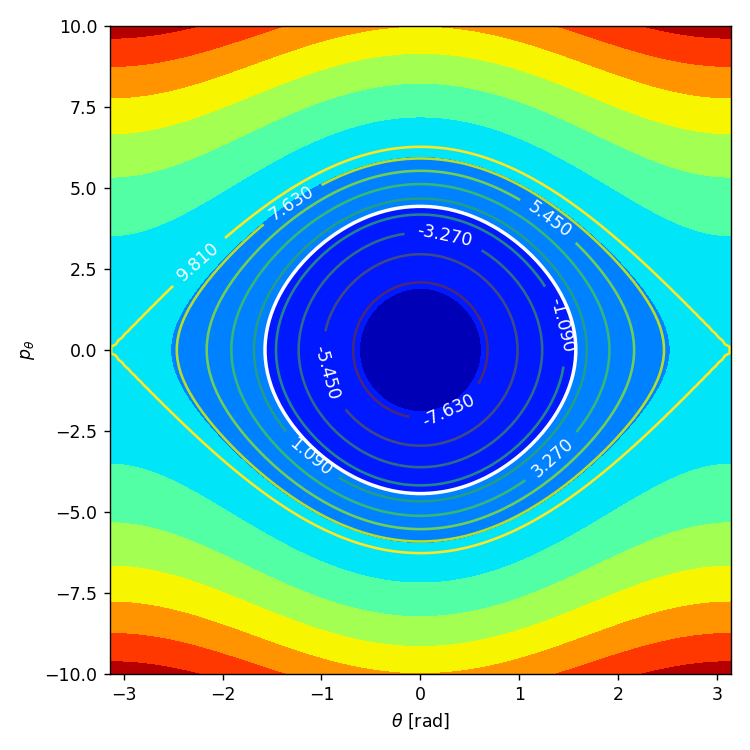

In [3]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(6,6))
ax=fig.gca()

#Contorno de colores
c=ax.contourf(TETAS,PTETAS,HS,10,cmap="jet")

#Lineas de contornos
c=ax.contour(TETAS,PTETAS,HS,linspace(-m*g*L,m*g*L,10))
c.clabel(colors='w')

#Controno de H=0
c=ax.contour(TETAS,PTETAS,HS,[0],colors=['w'],linewidths=2)

#Decoración
ax.set_xlabel(r"$\theta$ [rad]")
ax.set_ylabel(r"$p_\theta$")
fig.tight_layout();

<a id='code:contornos_espacio_fase'></a><center><b>Figura 10.173.</b> </center>

¿Cómo interpretamos el diagrama de contornos del Hamiltoniano en el espacio de fase?.  Al fijar unas condiciones iniciales (ángulo y momentum angular $p_\theta$), estamos escogiendo un punto de partida en el espacio de fase.  Supongamos por ejemplo que comenzamos con $\theta=45^\circ$ y $p_\theta=0$.  Las ecuaciones canónicas de Hamilton indican que la partícula se moverá siguiendo una trayectoria de igual valor de $H$.  En este caso:

$$
H_\mathrm{PS}=-mgL\cos 45^\circ
$$

El valor de $H$ para estas condiciones iniciales es negativo.

En la \ref{fig:code:contornos_espacio_fase} todos los valores negativos de $H$ están dentro del contorno blanco ($H=0$).  Los contornos de $H$ en esa región desl espacio de fase tienen una forma ovalada (elíptica).  Estas elipses tiene centro en el origen del espacio de fase y su eje mayor esta limitado a lado y lado por el valor inicial de $\theta=45^\circ$.  Sabemos, por el análisis realizado en la sección anterior que la partícula se moverá en el espacio de fase sobre esa elipse siguiendo las manecillas del reloj.  Es decir, si empieza en el extremo del eje mayor (en el que $p_\theta=0$) con el tiempo su momento se irá haciendo negativo hasta alcanzar un valor mínimo (máxima velocidad) cuando $\theta=0$.  Después de eso la rapidez empezará a disminuir a medida que el ángulo $\theta$ se hace negativo pero más grande en valor absoluto hasta alcanzar el otro extremo del eje mayor.  Allí, la rapidez cera nuevamente cero ($p_\theta=0$).  Pero el movimiento continúa.  Ahora el momento empezará a aumentar y será positivo, hasta alcanzar nuevamente un valor máximo cuando la partícula pase por $\theta=0$ y finalmente volverá a su posición inicial, para repetir después de nuevo la misma sucesión de movimientos.

El análisis anterior no es otra cosa que una versión muy elaborada de la cinemática que conocemos bastante bien de un péndulo.  Lo interesante de todo esto es ver como ese movimiento pendular que tan bien conocemos en el espacio físico corresponde a una órbita cerrada en el espacio de fase.  Tener la capacidad para relacionar lo que pasa en el espacio de fase con movimientos en el espacio físico, es una importante habilidad en la mecánica moderna.

¿Qué pasa ahora si lanzamos la partícula en reposo pero en un ángulo $\theta=90^\circ$ ($\theta=1.57$ rad).  En este caso el Hamiltoniano alcanza un valor crítico 

$$
H_\mathrm{PS}=-mgL\cos 90^\circ=0
$$
sin embargo la trayectoria sigue estano acotada (es una elipse en el espacio de fases).

Para ángulos iniciales mayores a $90^\circ$ la trayectoria todavía es acotada, pero la forma de la misma en el espacio de fase se va modificando.  Ya no tiene la clásica forma de una elipse sino que se parece ahora al contorno de un *ojo* (ver curvas de contorno con $H>0$ en la \ref{fig:code:contornos_espacio_fase}).

La situación se vuelve crítica cuando soltamos el péndulo desde un ángulo de $\theta=180^\circ$.  Todavía la trayectoria en el espacio de fase es acotada y la partícula vuelve exactamente a donde partío pero hay una pequeña diferencia respecto a los casos anteriores.  Si en lugar de soltar la partícula en $\theta=180^\circ$, la lanzamos con una pequeña velocidad angular inicial dirigida al punto de equilibrio (es decir el punto inicial se encuentra un poco por debajo del vértice del contorno correspondiente a $\theta=180^\circ,p_\theta=0$) el movimiento en el espacio de fase ya no esta *acotado*.  La partícula comienza a recorrer el espacio de fase en una trayectoria sinuosa en la que siempre $p_\theta<0$, pero cuyo valor absoluto se hace mínimo es $\theta=\pi,-\pi,-3\pi,\ldots$, y se hace máximo en valor absoluto cuando $\theta=0,2\pi,4\pi,\ldots$

Por muchas palabras que usemos, la mejor manera de comprender la conexión entre el *mapa del Hamiltoniano* del péndulo simple y las peculiaridades de las trayectorias del sistema en el espacio físico es justamente resolviendo las ecuaciones de movimiento del sistema y representando la solución en el espacio de fase.

Para ello necesitamos primero deducir las ecuaciones de movimiento del sistema.  En el formalismo Hamiltoniano, dichas ecuaciones se obtienen directamente de reemplazar el Hamiltoniano de sistema en las ecuaciones canónicas de Hamilton.  En el caso del péndulo simple el resultado es:

\begin{eqnarray}
\dot\theta & = & \frac{\partial H}{\partial p_\theta}=\frac{p_\theta}{mL^2}\\
\dot p_\theta & = & -\frac{\partial H}{\partial \theta}=-mgL\sin\theta\\
\end{eqnarray}

Al excribir explícitamente las ecuaciones canónicas de Hamilton de un sistema concreto, reconocemos inmediatamente el éxito de nuestra empresa original.  En lugar de tener una ecuación diferencial de segundo orden, como la que nos entregaría la aplicación del formalismo lagrangiano, el formalismo Hamiltoniano nos entrega dos ecuaciones de primer orden en las que las tasas de cambio de una variable no se mezclan de forma desorganizada con las de las otras variables.

Podemos implementar estas ecuaciones diferenciales con la rutina:

In [4]:
def edm_pendulosimple_hamiltoniano(Y,t,m,L):
    #Constantes
    g=9.81
    
    #Variables
    teta=Y[0]
    pteta=Y[1]
    
    #Derivadas
    from numpy import sin
    dtetadt=pteta/(m*L**2)
    dptetadt=-m*g*L*sin(teta)
    
    return [dtetadt,dptetadt]

Asignamos valores específicos a los parámetros del sistema y resolvemos numéricamente las ecuaciones de movimiento:

In [5]:
#Parámetros del sistema
m=1.0
L=1.0
g=9.81
#Período de oscilacion teórico
from numpy import sqrt
T=2*pi*sqrt(L/g)

#Factor de conversión
from numpy import pi,linspace
deg=pi/180
rad=1/deg

#Condiciones iniciales
from numpy import pi,linspace
Y=[45*deg,0.0]
ts=linspace(0,T,100)

#Solución numérica de las e.d.m.
from scipy.integrate import odeint
solucion=odeint(edm_pendulosimple_hamiltoniano,Y,ts,args=(m,L))

#Extraemos y convertimos los ángulos al intervalo [-pi,pi]
from numpy import mod
tetas=mod(solucion[:,0],2*pi)
tetas[tetas>pi]=tetas[tetas>pi]-2*pi
#Extraemos los momentos
ptetas=solucion[:,1]

#Posiciones en el espacio coordenado
from numpy import sin,cos
xs=L*sin(tetas)
ys=-L*cos(tetas)

Con el siguiente algoritmo podemos representar la trayectoria tanto en el espacio coordenado como en el espacio de fase (en el que además superponemos el *mapa de contornos* del Hamiltoniano):

<IPython.core.display.Javascript object>


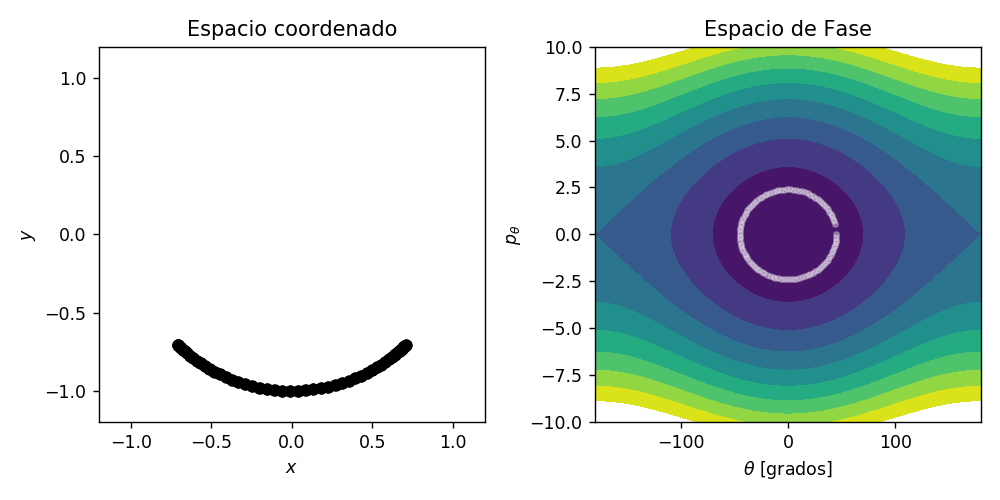

In [6]:
fig,axs=plt.subplots(1,2,figsize=(8,4))

#Espacio coordenado
axs[0].plot(xs,ys,'ko')
axs[0].set_xlim((-1.2*L,1.2*L))
axs[0].set_ylim((-1.2*L,1.2*L))
axs[0].set_xlabel(r"$x$")
axs[0].set_ylabel(r"$y$")
axs[0].set_title("Espacio coordenado")

#Espacio de Fase
axs[1].plot(tetas*rad,ptetas,'w.',alpha=0.3)
axs[1].contourf(TETAS*rad,PTETAS,HS,linspace(-m*g*L,5*m*g*L,10))
axs[1].set_xlabel(r"$\theta$ [grados]")
axs[1].set_ylabel(r"$p_\theta$")
axs[1].set_title("Espacio de Fase")

fig.tight_layout()

<a id='fig:10.02.00.00.FormalismoHamiltoniano.EspacioFase_174'></a><center><b>Figura 10.174.</b> </center>

Para ver una versión animada de este gráfico consulte la [versión web o interactiva](http://github.com/seap-udea/MecanicaCeleste-Zuluaga) del libro.

El siguiente algoritmo condensa los algoritmos vistos en esta sección y produce una versión animada del movimiento del péndulo.

<IPython.core.display.Javascript object>


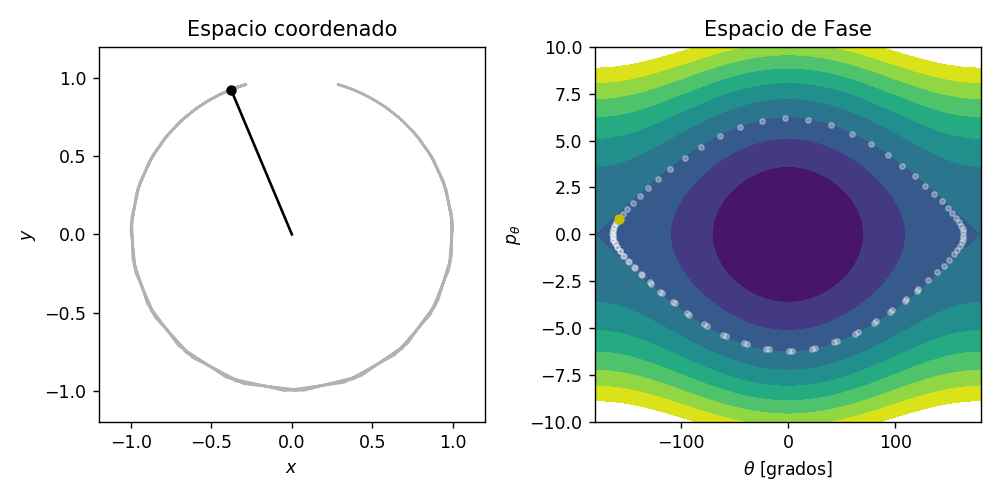

In [7]:
#Parámetros del sistema
m=1.0
L=1.0
g=9.81
T=2*pi*sqrt(L/g)
Nt=100

#Condiciones iniciales
Y=[120*deg,-3.0]
ts=linspace(0,3*T,Nt)

#Solución numérica
solucion=odeint(edm_pendulosimple_hamiltoniano,Y,ts,args=(m,L))
tetas=mod(solucion[:,0],2*pi)
tetas[tetas>pi]=tetas[tetas>pi]-2*pi
ptetas=solucion[:,1]
xs=L*sin(tetas)
ys=-L*cos(tetas)

#Gráfico
fig,axs=plt.subplots(1,2,figsize=(8,4))

#Espacio coordenado
axs[0].plot(xs,ys,'k-',alpha=0.3)
punto_coord,=axs[0].plot([],[],'ko',ms=5)
cuerda,=axs[0].plot([],[],'k-')
axs[0].set_xlim((-1.2*L,1.2*L))
axs[0].set_ylim((-1.2*L,1.2*L))
axs[0].set_xlabel(r"$x$")
axs[0].set_ylabel(r"$y$")
axs[0].set_title("Espacio coordenado")

#Espacio de Fase
axs[1].plot(tetas*rad,ptetas,'w.',alpha=0.3)
punto_fase,=axs[1].plot([],[],'yo',ms=5)
axs[1].contourf(TETAS*rad,PTETAS,HS,linspace(-m*g*L,5*m*g*L,10))
axs[1].set_xlabel(r"$\theta$ [grados]")
axs[1].set_ylabel(r"$p_\theta$")
axs[1].set_title("Espacio de Fase")

fig.tight_layout()

def animacion(it):
    punto_coord.set_data(xs[it],ys[it])
    cuerda.set_data([0,xs[it]],[0,ys[it]])
    punto_fase.set_data(tetas[it]*rad,ptetas[it])
    return punto_coord,punto_fase

from matplotlib import animation
anim=animation.FuncAnimation(fig,animacion,frames=Nt,interval=50,blit=True,repeat=False);

Para tener más control sobre la animación se puede usar este algoritmo:

In [8]:
from matplotlib import rcParams
rcParams['animation.embed_limit']=2**128
from IPython.display import HTML
HTML(anim.to_jshtml())

[Indice](index.ipynb) | Previo: [FormalismoHamiltoniano.EcuacionesCanonicas](10.01.00.00.FormalismoHamiltoniano.EcuacionesCanonicas.ipynb) | Siguiente: [FormalismoHamiltoniano.Simetrias](10.02.00.00.FormalismoHamiltoniano.Simetrias.ipynb)